# Assignment 7: Gradient Descent (Task 2)

For this assignment, you may `numpy`, `pandas`, and packages from the Python standard library.

List your team members (name, matriculation number, course of study) in the following cell:

| Name | Matr. Nr. | Study Program |
| ---  | ---       | ---           |
| Dao Khanh Duy | 3591406 | INFOTECH M.Sc. |
| Harshal Sanjay Nandigramwar | 3575008 | INFOTECH M.Sc. |
| Xiwen Feng | 3219649 | Natural Language Processing B.Sc. |

In this task, you will implement the training of linear regression model by using Mean Squarred Error and Correntropy loss functions. Use gradient descent to optimize the weights of linear regression model. The definition of MSE and Correntropy loss fucntions are given in the Assignment7.pdf file.

There will be two linear regression models, one is trained by using MSE loss and the other is trained by Correntropy loss function. 

In addition, two different learning rates are used for training of each models. The reason is that each loss function has different shape and requires specific learning rate.

Implement the MSE and Correntropy loss funcitons in the given function templates. Additionally, compute gradients of MSE and Correntropy loss functions and impement them in the corresponding function templates. The gradient should be computed given particular data sample ($x_i, y_i$).

The data is generated by sampling from the linear function $f(x) = 2x$, and the output of the third data sample is contaminated by noise.

In [1]:
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

In [2]:
#Weight initialization
w_mse = 0.1
w_corr = 0.1

In [3]:
#learning rate for MSE and Correntropy loss optimization
lr = 0.001
lr_corr = 0.1

In [4]:
#Define Mean Squared Error Function
def mse(y, y_mse):
    mse = np.sum(np.square(y_mse - y))
    mse /= len(y)
    return mse

#Define Correntopy Function
def corr(y, y_corr):    
    corr = np.sum(np.exp(-np.square(y_corr - y)))
    corr /= len(y)
    return -corr

In [5]:
# Define Gradient of MSE Function
def mse_gradient(w_mse, xi, yi):
    N = len(yi)
    y_mse = w_mse * xi

    # fill here with gradient of MSE
    mse_grad = np.sum((y_mse - yi) * xi)
    mse_grad *= (2 / N)
    return mse_grad

# Define Gradient of Correntropy Function
def corr_gradient(w_corr, xi, yi):
    N = len(yi)
    y_corr = w_corr * xi

    # fill here with gradient of Correntropy
    corr_grad = np.sum(np.exp(-np.square(y_corr - y)) * (y_corr - yi) * xi)
    corr_grad *= (2 / N)
    return corr_grad

In [6]:
# Generate Data
x = np.arange(5)
y = 2 * x

In [7]:
# Impulsive Noide (make one sample contaminated with high noise)
y_noise = y.copy()
y_noise[2] = 100

In [8]:
def training(x, y, y_noise, w_mse, w_corr, use_noise=True):
    if use_noise:
        y_true = y_noise
    else:
        y_true = y

    for i in range(1000):
        ids = np.random.randint(5, size=1)
        xi = x[ids]
        yi = y_true[ids]

        # Update linear regression weights based on MSE 
        w_mse -= lr * mse_gradient(w_mse, xi, yi)

        # Update linear regression weights based on Correntropy
        w_corr -= lr_corr * corr_gradient(w_corr, xi, yi)


    # Approximation of Output With Linear Function Trained on MSE and Correntropy
    y_mse = w_mse * x
    y_corr = w_corr * x

    # Final Loss Values
    err = mse(y_true, y_mse)
    coerr = corr(y_true, y_corr)

    # Plot the output of linear function trained with MSE and Correntopy
    plt.plot(y_mse, label='MSE')
    plt.plot(y_corr, label='Correntropy')
    plt.plot(y, label='Original')
    plt.legend()
    plt.show()

    print(f'Final weights:\nw_mse: {w_mse}\nw_corr: {w_corr}')
    
    return err, coerr


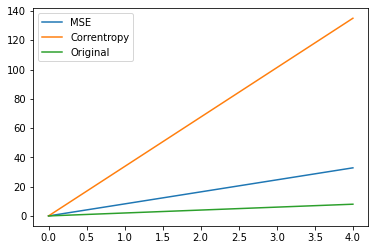

Final weights:
w_mse: 8.212330650973495
w_corr: 33.76252625558979

Errors:
MSE: 1597.651318707384
Correntropy: -0.2


In [9]:
err, coerr = training(x, y, y_noise, w_mse, w_corr, use_noise=True)
print(f'\nErrors:\nMSE: {err}\nCorrentropy: {coerr}')

##### Observations

* Correntropy is more sensitive to noise and outliers when compared to mse.

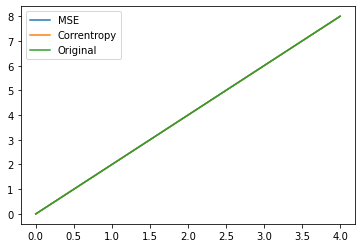

Final weights:
w_mse: 1.9999936703360919
w_corr: 2.0

Errors:
MSE: 2.4038787114208843e-10
Correntropy: -1.0


In [10]:
# This is without noise. Proves that things are working correct, 
# as weights are very close to 2 in both the cases.

err, coerr = training(x, y, y_noise, w_mse, w_corr, use_noise=False)
print(f'\nErrors:\nMSE: {err}\nCorrentropy: {coerr}')